<a href="https://colab.research.google.com/github/ThanikPimpiban/DWDM21/blob/main/Project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd #ส่วนของการ Import
import os

In [117]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
path = '/content/drive/My Drive/DWDM_Project' #กำหนด path ของโฟลเดอร์ที่ Data อยู่

##ที่มาของข้อมูลสถานีรับส่งผู้โดยสารการรถไฟเเห่งประเทศไทย

https://data.go.th/dataset/station

In [119]:
data_st = pd.read_csv(os.path.join(path,'data_station.csv')) #กำหนดตัวแปร data_st เป็นข้อมูลของสถานีรถไฟแต่ละสถานี
data_st #เรียกดูตารางของสถานีรถไฟแต่ละสถานี

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track
0,1,1001,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14,0,0,0,11,13.739277,100.517391,1,1,1
1,2,1002,ยมราช,Yommaraj,ยช.,YMR,勇马拉,14,2,2,2,99,0,0,1,1,1
2,3,1004,สามเสน,Sam Sen,สส.,SAM,三森,14,5,4,4,1,13.779293,100.529235,1,1,1
3,4,1006,ประดิพัทธ์,Pra Dipat,ปอิ.,PDP,帕涤潘,14,6,6,6,99,0,0,1,1,1
4,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.54005,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,678,5025,บางโทรัด,Bang Thorat,งโ.,BTR,邦托拉,0,14,-13,13,98,0,0,1,0,0
678,679,5026,บ้านกาหลง,Ban Ka Long,กห.,BLG,班卡龙,0,16,-15,15,98,0,0,1,0,0
679,680,5027,บ้านนาขวาง,Ban Na Khwang,อ้บ.,BNW,班那煌,0,18,-17,17,98,0,0,1,0,0
680,681,5028,บ้านนาโคก,Ban Na Khok,าโ.,BNH,班那柯,0,20,-19,19,98,0,0,1,0,0


##ที่มาของข้อมูลขบวนรถไฟสำหรับรับ-ส่งผู้โดยสาร

https://data.go.th/dataset/train

In [120]:
data_t = pd.read_csv(os.path.join(path,'data_train.csv')) #กำหนดตัวแปร data_t เป็นข้อมูลของรถไฟ
data_t #เรียกดูตารางข้อมูลรถไฟ

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service
0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False
1,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True
2,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False
3,1,1,2.0,1053,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True
4,1,1,4.0,283,ธรรมดา,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False
...,...,...,...,...,...,...,...,...,...,...,...,...
229,5,2,26.0,260,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False
230,5,2,27.0,252,ธรรมดา,4142,ประจวบคีรีขันธ์,4002,ธนบุรี,Prachuap Khiri Khan,Thon Buri,False
231,5,2,28.0,254,ธรรมดา,4203,หลังสวน,4002,ธนบุรี,Lang Suan,Thon Buri,False
232,5,2,29.0,258,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False


##ที่มาของข้อมูล railstation

https://datagov.mot.go.th/dataset/train-station

In [121]:
data_rst = pd.read_csv(os.path.join(path,'railstation_new.csv')) #กำหนดตัวแปร data_rst ให้เป็นรางรถไฟ
data_rst #เรียกดูตารางของรางรถไฟ

,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,1,บ้านเกาะปริง,BAN KO PRING UNMANNED STATION,,ทุ่งสง,NaN,99.644994,8.213274
1,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456
2,3,โรงเรียนการบิน,FLYING TRAINING SCHOOL UNMANNED STATION,,กำแพงแสน,,99.956660,14.088246
3,4,บ้านปลักแรด,BAN PLUK RAET UNMANNED STATION,,ท่าเรือ,,100.725785,14.530267
4,5,เด่นชัย,DEN CHAI RAILWAY STATION,PHRAE,เด่นชัย,DEN CHAI,100.046225,17.980781
...,...,...,...,...,...,...,...,...
677,678,ศูนย์ราชการจังหวัดสระแก้ว,THE GOVERNMENT COMPLEX SA KAEO UNMANNED STATION,,เมืองสระแก้ว,,102.138802,13.799641
678,679,ทุ่งทอง,THUNG THONG UNMANNED STATION,,ท่าม่วง,,99.638000,13.980168
679,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784
680,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516


##ที่มาของข้อมูลชื่อตำบล อำเภอ และจังหวัด

https://www.bot.or.th/Thai/Statistics/DataManagementSystem/TempClose/FI_FM1/Code/DocLib_StandardCodeMapping/Location_Postal%20Code.xls

In [122]:
data_location = pd.read_csv(os.path.join(path,'Location_Postal_Code.csv')) ## นำเข้าข้อมูลชื่อตำบล อำเภอ และจังหวัด
data_location ##เรียกดูข้อมูลชื่อตำบล อำเภอ และจังหวัด

,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,100101,กรุงเทพ,พระนคร,พระบรมมหาราชวัง,10200
1,100102,กรุงเทพ,พระนคร,วังบูรพาภิรมย์,10200
2,100103,กรุงเทพ,พระนคร,วัดราชบพิธ,10200
3,100104,กรุงเทพ,พระนคร,สำราญราษฎร์,10200
4,100105,กรุงเทพ,พระนคร,ศาลเจ้าพ่อเสือ,10200
...,...,...,...,...,...
7421,961203,นราธิวาส,จะแนะ,ผดุงมาตร,96220
7422,961204,นราธิวาส,จะแนะ,ช้างเผือก,96220
7423,961301,นราธิวาส,เจาะไอร้อง,จวบ,96130
7424,961302,นราธิวาส,เจาะไอร้อง,บูกิต,96130


##ที่มาของข้อมูลสถานการณ์การท่องเที่ยวในประเทศ รายจังหวัด ปี 2563

https://mots.go.th/more_news_new.php?cid=594

In [123]:
data_tourist = pd.read_csv(os.path.join(path,'สถานการณ์การท่องเที่ยวในประเทศ รายจังหวัด ปี 2563.csv')) ## นำเข้าข้อมูลสถานการณ์การท่องเที่ยวในประเทศ รายจังหวัด ปี 2563
data_tourist ##เรียกดูข้อมูล

,ภาค,จังหวัด,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,ภาคกลาง,กรุงเทพ,23617914.0
1,ภาคกลาง,ลพบุรี,1659868.0
2,ภาคกลาง,พระนครศรีอยุธยา,3560866.0
3,ภาคกลาง,สระบุรี,1673819.0
4,ภาคกลาง,ชัยนาท,394900.0
...,...,...,...
72,ภาคตะวันออกเฉียงเหนือ,อุบลราชธานี,1537178.0
73,ภาคตะวันออกเฉียงเหนือ,สกลนคร,856974.0
74,ภาคตะวันออกเฉียงเหนือ,ยโสธร,303461.0
75,ภาคตะวันออกเฉียงเหนือ,อำนาจเจริญ,153692.0


#ดูว่าข้อมูลมี data missing

In [124]:
data_st.isnull() ##ดูค่า Missing ในตาราง data_st

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [125]:
data_t.isnull() ##ดูค่า Missing ในตาราง data_t

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False


In [126]:
data_rst.isnull() ##ดูค่า Missing ในตาราง data_rst

,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
677,False,False,False,False,False,False,False,False
678,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False


In [127]:
data_location.isnull() ##ดูค่า Missing ในตาราง data_location

,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
7421,False,False,False,False,False
7422,False,False,False,False,False
7423,False,False,False,False,False
7424,False,False,False,False,False


#สรุปข้อมูลเป็นรายคอลลัมม์ว่ามี missing

In [128]:
data_st.isnull().any()  ##ดูค่า Missing รายคอลัมน์ของตาราง data_st

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short            True
chname              True
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
dtype: bool

In [129]:
data_t.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_t

Zone           False
goback         False
Num            False
IdTrain        False
NameFee        False
StStart        False
NameSt         False
StFinal        False
NameSt_L       False
NameStEng      False
NameStEng_L    False
Service        False
dtype: bool

In [130]:
data_rst.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_rst

OBJECTID    False
NAMET       False
NAMEE       False
ProvName    False
AmpName     False
TamName      True
X           False
Y           False
dtype: bool

In [131]:
data_location.isnull().any()  ##ดูค่า Missing รายคอลัมน์ของตาราง data_location

Location Code    False
จังหวัด          False
เขต/อำเภอ         True
แขวง/ตำบล        False
รหัสไปรษณีย์     False
dtype: bool

#Drop missing value

ลบค่าที่เป็น Missing

In [132]:
data_st = data_st.dropna() ##ลบค่า Missing ในตาราง data_st
data_st ##เรียกดูตาราง data_st

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track
0,1,1001,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14,0,0,0,11,13.739277,100.517391,1,1,1
1,2,1002,ยมราช,Yommaraj,ยช.,YMR,勇马拉,14,2,2,2,99,0,0,1,1,1
2,3,1004,สามเสน,Sam Sen,สส.,SAM,三森,14,5,4,4,1,13.779293,100.529235,1,1,1
3,4,1006,ประดิพัทธ์,Pra Dipat,ปอิ.,PDP,帕涤潘,14,6,6,6,99,0,0,1,1,1
4,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.54005,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,678,5025,บางโทรัด,Bang Thorat,งโ.,BTR,邦托拉,0,14,-13,13,98,0,0,1,0,0
678,679,5026,บ้านกาหลง,Ban Ka Long,กห.,BLG,班卡龙,0,16,-15,15,98,0,0,1,0,0
679,680,5027,บ้านนาขวาง,Ban Na Khwang,อ้บ.,BNW,班那煌,0,18,-17,17,98,0,0,1,0,0
680,681,5028,บ้านนาโคก,Ban Na Khok,าโ.,BNH,班那柯,0,20,-19,19,98,0,0,1,0,0


In [133]:
data_rst = data_rst.dropna() ##ลบค่า Missing ในตาราง data_rst
data_rst ##เรียกดูตาราง data_rst

,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
1,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456
2,3,โรงเรียนการบิน,FLYING TRAINING SCHOOL UNMANNED STATION,,กำแพงแสน,,99.956660,14.088246
3,4,บ้านปลักแรด,BAN PLUK RAET UNMANNED STATION,,ท่าเรือ,,100.725785,14.530267
4,5,เด่นชัย,DEN CHAI RAILWAY STATION,PHRAE,เด่นชัย,DEN CHAI,100.046225,17.980781
5,6,บ้านกกกว้าว,BAN KOK KWAO HALT,,ตาคลี,,100.442303,15.141322
...,...,...,...,...,...,...,...,...
677,678,ศูนย์ราชการจังหวัดสระแก้ว,THE GOVERNMENT COMPLEX SA KAEO UNMANNED STATION,,เมืองสระแก้ว,,102.138802,13.799641
678,679,ทุ่งทอง,THUNG THONG UNMANNED STATION,,ท่าม่วง,,99.638000,13.980168
679,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784
680,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516


In [134]:
data_location = data_location.dropna() ##ลบค่า Missing ในตาราง data_location
data_location ##เรียกดูตาราง data_location

,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,100101,กรุงเทพ,พระนคร,พระบรมมหาราชวัง,10200
1,100102,กรุงเทพ,พระนคร,วังบูรพาภิรมย์,10200
2,100103,กรุงเทพ,พระนคร,วัดราชบพิธ,10200
3,100104,กรุงเทพ,พระนคร,สำราญราษฎร์,10200
4,100105,กรุงเทพ,พระนคร,ศาลเจ้าพ่อเสือ,10200
...,...,...,...,...,...
7421,961203,นราธิวาส,จะแนะ,ผดุงมาตร,96220
7422,961204,นราธิวาส,จะแนะ,ช้างเผือก,96220
7423,961301,นราธิวาส,เจาะไอร้อง,จวบ,96130
7424,961302,นราธิวาส,เจาะไอร้อง,บูกิต,96130


#ตรวจสอบเมื่อลบออกไปแล้วตรวจสอบว่ายังไม่ข้อมูลที่หายไปหรือไม่

In [135]:
data_st.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_st หลังการลบค่า Missing

id                 False
station_code       False
name               False
en_name            False
th_short           False
en_short           False
chname             False
controldivision    False
exact_km           False
exact_distance     False
km                 False
class              False
lat                False
long               False
active             False
giveway            False
dual_track         False
dtype: bool

In [136]:
data_rst.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_rst หลังการลบค่า Missing

OBJECTID    False
NAMET       False
NAMEE       False
ProvName    False
AmpName     False
TamName     False
X           False
Y           False
dtype: bool

In [137]:
data_location.isnull().any() ##ดูค่า Missing รายคอลัมน์ของตาราง data_location หลังการลบค่า Missing

Location Code    False
จังหวัด          False
เขต/อำเภอ        False
แขวง/ตำบล        False
รหัสไปรษณีย์     False
dtype: bool

#Percent of missing data from dropna

เปอร์เซ็นต์ข้อมูลที่สูญเสีย

In [138]:
##ตาราง data_st
st_b = 682
st_a = 679
print(f'before = {st_b} \nafter = {st_a}\nwhich is {100*((st_b-st_a)/st_b)}')

before = 682 
after = 679
which is 0.43988269794721413



จากการคำนวณจะเห็นได้ว่าตาราง data_st มีข้อมูลที่สูญเสีย 0.43 %

In [139]:
##ตาราง data_rst
rst_b = 682
rst_a = 681
print(f'before = {rst_b} \nafter = {rst_a}\nwhich is {100*((rst_b-rst_a)/rst_b)}')

before = 682 
after = 681
which is 0.1466275659824047



จากการคำนวณจะเห็นได้ว่าตาราง data_rst มีข้อมูลที่สูญเสีย 0.14 %

In [140]:
##ตาราง data_location
loca_b = 7426
loca_a = 7425
print(f'before = {loca_b} \nafter = {loca_a}\nwhich is {100*((loca_b-loca_a)/loca_b)}')

before = 7426 
after = 7425
which is 0.013466199838405602



จากการคำนวณจะเห็นได้ว่าตาราง data_location มีข้อมูลที่สูญเสีย 0.01 %

# challenge
##1.ทำนายประเภทรถไฟที่จะเลือกใช้บริการ โดยใช้ระยะทางระหว่างสถานี จำนวนนักท่องเที่ยวในจังหวัดต้นทาง จำนวนนักท่องเที่ยวในจังหวัดปลายทาง
##2.แบ่งกลุ่มข้อมูลที่มี ลองจิจูด(column : X) และ ละติจูด (column : Y) ที่ใกล้กันจำนวน 5 กลุ่ม
##3.หาจังหวัดที่มีรถไฟขาเข้ามากที่สุด

#ทำนายประเภทรถไฟที่จะเลือกใช้บริการ โดยใช้ระยะทางระหว่างสถานี จำนวนนักท่องเที่ยวในจังหวัดต้นทาง จำนวนนักท่องเที่ยวในจังหวัดปลายทาง


In [148]:
table_l1 = data_st.merge(data_rst,how='right',left_on='name',right_on='NAMET') #ทำการเชื่อมตาราง 2 ตาราง คือ data_rst และ data_st
table_l1

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,โรงเรียนการบิน,FLYING TRAINING SCHOOL UNMANNED STATION,,กำแพงแสน,,99.956660,14.088246
2,28.0,1038.0,บ้านปลักแรด,Ban Plug Rad,แด.,BPR,班芭腊,11.0,99.0,99.0,99.0,98.0,0,0,1.0,1.0,1.0,4,บ้านปลักแรด,BAN PLUK RAET UNMANNED STATION,,ท่าเรือ,,100.725785,14.530267
3,102.0,1164.0,เด่นชัย,Den Chai,ดช.,DCH,登猜,33.0,534.0,533.0,533.0,1.0,17.980588,100.046062,1.0,1.0,0.0,5,เด่นชัย,DEN CHAI RAILWAY STATION,PHRAE,เด่นชัย,DEN CHAI,100.046225,17.980781
4,43.0,1062.0,บ้านกกกว้าว,Ban Khok Kwaow,วอ้.,BKW,班阁高,31.0,177.0,176.0,176.0,99.0,0,0,1.0,0.0,0.0,6,บ้านกกกว้าว,BAN KOK KWAO HALT,,ตาคลี,,100.442303,15.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678,ศูนย์ราชการจังหวัดสระแก้ว,THE GOVERNMENT COMPLEX SA KAEO UNMANNED STATION,,เมืองสระแก้ว,,102.138802,13.799641
677,414.0,4052.0,ทุ่งทอง,Thung Thong,ทอุ.,TTH,童通,11.0,119.0,-102.0,102.0,98.0,0,0,1.0,0.0,0.0,679,ทุ่งทอง,THUNG THONG UNMANNED STATION,,ท่าม่วง,,99.638000,13.980168
678,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784
679,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516


In [149]:
table_l1 = table_l1.dropna() ## กำจัดค่า missing ของ table_l1
table_l1

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456
2,28.0,1038.0,บ้านปลักแรด,Ban Plug Rad,แด.,BPR,班芭腊,11.0,99.0,99.0,99.0,98.0,0,0,1.0,1.0,1.0,4,บ้านปลักแรด,BAN PLUK RAET UNMANNED STATION,,ท่าเรือ,,100.725785,14.530267
3,102.0,1164.0,เด่นชัย,Den Chai,ดช.,DCH,登猜,33.0,534.0,533.0,533.0,1.0,17.980588,100.046062,1.0,1.0,0.0,5,เด่นชัย,DEN CHAI RAILWAY STATION,PHRAE,เด่นชัย,DEN CHAI,100.046225,17.980781
4,43.0,1062.0,บ้านกกกว้าว,Ban Khok Kwaow,วอ้.,BKW,班阁高,31.0,177.0,176.0,176.0,99.0,0,0,1.0,0.0,0.0,6,บ้านกกกว้าว,BAN KOK KWAO HALT,,ตาคลี,,100.442303,15.141322
5,351.0,3078.0,หนองสัง,Nong Sang,อส.,NNS,农尚,13.0,173.0,-172.0,172.0,4.0,13.980825,101.82539,1.0,1.0,0.0,7,หนองสัง,NONG SANG RAILWAY STATION,,กบินทร์บุรี,,101.825379,13.980567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,285.0,2275.0,เฉลิมกาญจนา,Chalerm Kanchana,ฉก.,CKK,查楞干乍那,23.0,522.0,522.0,522.0,98.0,0,0,1.0,0.0,0.0,676,เฉลิมกาญจนา,CHALOEM KANCHANA UNMANNED STATION,,เมืองศรีสะเกษ,,104.393006,15.106812
675,375.0,3124.0,ตลาดน้ำ 4 ภาค,Talat Nam 4 Phak,ตภ.,TNP,四方水上市场,13.0,163.0,163.0,163.0,98.0,0,0,1.0,0.0,0.0,677,ตลาดน้ำ 4 ภาค,4 REGION FLOATING MARKET UNMANNED STATION,,บางละมุง,,100.909693,12.869605
677,414.0,4052.0,ทุ่งทอง,Thung Thong,ทอุ.,TTH,童通,11.0,119.0,-102.0,102.0,98.0,0,0,1.0,0.0,0.0,679,ทุ่งทอง,THUNG THONG UNMANNED STATION,,ท่าม่วง,,99.638000,13.980168
678,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784


In [313]:
table_l2 = table_l1.merge(data_location,how='left',left_on='AmpName',right_on='เขต/อำเภอ') #ทำการเชื่อมตาราง 3 ตาราง คือ data_rst  data_st เชื่อมกับ data_location
table_l2

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920601.0,ตรัง,ห้วยยอด,ห้วยยอด,92130.0
1,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920602.0,ตรัง,ห้วยยอด,หนองช้างแล่น,92130.0
2,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920605.0,ตรัง,ห้วยยอด,บางดี,92210.0
3,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920606.0,ตรัง,ห้วยยอด,บางกุ้ง,92210.0
4,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920607.0,ตรัง,ห้วยยอด,เขากอบ,92130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7056,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784,430118.0,หนองคาย,เมืองหนองคาย,เมืองหมี,43000.0
7057,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784,430119.0,หนองคาย,เมืองหนองคาย,สีกาย,43000.0
7058,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103602.0,กรุงเทพ,ดอนเมือง,สีกัน,10210.0
7059,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103604.0,กรุงเทพ,ดอนเมือง,ดอนเมือง,10210.0


In [151]:
table_l2 = table_l2.dropna() ### กำจัด missing ของ table_l2
table_l2

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920601.0,ตรัง,ห้วยยอด,ห้วยยอด,92130.0
1,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920602.0,ตรัง,ห้วยยอด,หนองช้างแล่น,92130.0
2,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920605.0,ตรัง,ห้วยยอด,บางดี,92210.0
3,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920606.0,ตรัง,ห้วยยอด,บางกุ้ง,92210.0
4,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920607.0,ตรัง,ห้วยยอด,เขากอบ,92130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7056,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784,430118.0,หนองคาย,เมืองหนองคาย,เมืองหมี,43000.0
7057,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784,430119.0,หนองคาย,เมืองหนองคาย,สีกาย,43000.0
7058,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103602.0,กรุงเทพ,ดอนเมือง,สีกัน,10210.0
7059,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103604.0,กรุงเทพ,ดอนเมือง,ดอนเมือง,10210.0


In [152]:
table_l3 = table_l2.merge(data_tourist,how='left',left_on='จังหวัด',right_on='จังหวัด') #ทำการเชื่อมตาราง 4 ตาราง คือ data_rst  data_st data_location เชื่อมกับ data_tourist
table_l3

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์,ภาค,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920601.0,ตรัง,ห้วยยอด,ห้วยยอด,92130.0,ภาคใต้,648092.0
1,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920602.0,ตรัง,ห้วยยอด,หนองช้างแล่น,92130.0,ภาคใต้,648092.0
2,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920605.0,ตรัง,ห้วยยอด,บางดี,92210.0,ภาคใต้,648092.0
3,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920606.0,ตรัง,ห้วยยอด,บางกุ้ง,92210.0,ภาคใต้,648092.0
4,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920607.0,ตรัง,ห้วยยอด,เขากอบ,92130.0,ภาคใต้,648092.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784,430118.0,หนองคาย,เมืองหนองคาย,เมืองหมี,43000.0,ภาคตะวันออกเฉียงเหนือ,1344823.0
7027,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784,430119.0,หนองคาย,เมืองหนองคาย,สีกาย,43000.0,ภาคตะวันออกเฉียงเหนือ,1344823.0
7028,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103602.0,กรุงเทพ,ดอนเมือง,สีกัน,10210.0,ภาคกลาง,23617914.0
7029,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103604.0,กรุงเทพ,ดอนเมือง,ดอนเมือง,10210.0,ภาคกลาง,23617914.0


In [153]:
table_l3 = table_l3.dropna() ## กำจัด missing ของ table_l3
table_l3

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์,ภาค,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920601.0,ตรัง,ห้วยยอด,ห้วยยอด,92130.0,ภาคใต้,648092.0
1,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920602.0,ตรัง,ห้วยยอด,หนองช้างแล่น,92130.0,ภาคใต้,648092.0
2,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920605.0,ตรัง,ห้วยยอด,บางดี,92210.0,ภาคใต้,648092.0
3,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920606.0,ตรัง,ห้วยยอด,บางกุ้ง,92210.0,ภาคใต้,648092.0
4,565.0,4281.0,ห้วยยอด,Huai Yot,ยอ.,HYO,辉勇,42.0,817.0,-800.0,800.0,3.0,7.786067,99.638224,1.0,1.0,0.0,2,ห้วยยอด,HUAI YOT RAILWAY STATION,,ห้วยยอด,,99.637987,7.785456,920607.0,ตรัง,ห้วยยอด,เขากอบ,92130.0,ภาคใต้,648092.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784,430118.0,หนองคาย,เมืองหนองคาย,เมืองหมี,43000.0,ภาคตะวันออกเฉียงเหนือ,1344823.0
7027,297.0,2305.0,ตลาดหนองคาย,Talat Nong Khai,ตง.,TNK,塔拉廊开,24.0,624.0,623.0,623.0,98.0,17.8783605,102.722814,1.0,0.0,0.0,680,ตลาดหนองคาย,Talat Nong Khai,,เมืองหนองคาย,,102.725416,17.878784,430119.0,หนองคาย,เมืองหนองคาย,สีกาย,43000.0,ภาคตะวันออกเฉียงเหนือ,1344823.0
7028,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103602.0,กรุงเทพ,ดอนเมือง,สีกัน,10210.0,ภาคกลาง,23617914.0
7029,138.0,1233.0,แกรนด์ คาแนล,Grand Canal,คแ.,GRC,格兰卡内,14.0,24.0,24.0,24.0,99.0,0,0,1.0,1.0,1.0,681,แกรนด์ คาแนล,GRAND CANEL UNMANNED STATION,,ดอนเมือง,,100.608267,13.941516,103604.0,กรุงเทพ,ดอนเมือง,ดอนเมือง,10210.0,ภาคกลาง,23617914.0


In [154]:
table_l = table_l3[['station_code','name','exact_km','km','class','X','Y','จังหวัด','ภาค','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)']] ##เลือกคอลัมน์ที่ต้องการ
table_l ##แสดงข้อมูลของตารางที่เลือก

,station_code,name,exact_km,km,class,X,Y,จังหวัด,ภาค,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,4281.0,ห้วยยอด,817.0,800.0,3.0,99.637987,7.785456,ตรัง,ภาคใต้,648092.0
1,4281.0,ห้วยยอด,817.0,800.0,3.0,99.637987,7.785456,ตรัง,ภาคใต้,648092.0
2,4281.0,ห้วยยอด,817.0,800.0,3.0,99.637987,7.785456,ตรัง,ภาคใต้,648092.0
3,4281.0,ห้วยยอด,817.0,800.0,3.0,99.637987,7.785456,ตรัง,ภาคใต้,648092.0
4,4281.0,ห้วยยอด,817.0,800.0,3.0,99.637987,7.785456,ตรัง,ภาคใต้,648092.0
...,...,...,...,...,...,...,...,...,...,...
7026,2305.0,ตลาดหนองคาย,624.0,623.0,98.0,102.725416,17.878784,หนองคาย,ภาคตะวันออกเฉียงเหนือ,1344823.0
7027,2305.0,ตลาดหนองคาย,624.0,623.0,98.0,102.725416,17.878784,หนองคาย,ภาคตะวันออกเฉียงเหนือ,1344823.0
7028,1233.0,แกรนด์ คาแนล,24.0,24.0,99.0,100.608267,13.941516,กรุงเทพ,ภาคกลาง,23617914.0
7029,1233.0,แกรนด์ คาแนล,24.0,24.0,99.0,100.608267,13.941516,กรุงเทพ,ภาคกลาง,23617914.0


In [155]:
table_st1 = data_t.merge(data_rst,how='left',left_on='NameSt',right_on='NAMET') #ทำการเชื่อมตาราง 2 ตาราง คือ data_rst และ data_t
table_st1

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
0,1,1,0.0,997,เร็ว,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1.0,1049,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736
3,1,1,2.0,1053,ธรรมดา,1001,กรุงเทพ,1007,ชุมทางบางซื่อ,Bangkok,Bang Sue Junction,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4.0,283,ธรรมดา,1001,กรุงเทพ,3047,บ้านพลูตาหลวง,Bangkok,Ban Plu Ta Luang,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,5,2,26.0,260,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451
230,5,2,27.0,252,ธรรมดา,4142,ประจวบคีรีขันธ์,4002,ธนบุรี,Prachuap Khiri Khan,Thon Buri,False,99.0,ประจวบคีรีขันธ์,PRACHUAP KHIRI KHAN RAILWAY STATION,PRACHUAP KHIRI KHAN,เมืองประจวบคีรีขันธ์,PRACHUAP KHIRI KHAN,99.793905,11.807757
231,5,2,28.0,254,ธรรมดา,4203,หลังสวน,4002,ธนบุรี,Lang Suan,Thon Buri,False,20.0,หลังสวน,LANG SUAN RAILWAY STATION,CHUMPHON,หลังสวน,LANG SUAN,99.076502,9.949263
232,5,2,29.0,258,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451


In [156]:
table_st1 = table_st1.dropna() ## กำจัด missing ของตาราง table_st1
table_st1

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y
2,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736
15,1,2,0.0,998,เร็ว,3047,บ้านพลูตาหลวง,1001,กรุงเทพ,Ban Plu Ta Luang,Bangkok,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959
16,1,2,1.0,380,ธรรมดา,3015,หัวตะเข้,1001,กรุงเทพ,Hua Takhe,Bangkok,False,158.0,หัวตะเข้,HUA TAKHE RAILWAY STATION,BANGKOK,ลาดกระบัง,LAT KRABANG,100.783373,13.728363
17,1,2,2.0,384,ธรรมดา,3023,ชุมทางฉะเชิงเทรา,1001,กรุงเทพ,Chachoengsao Junction,Bangkok,False,404.0,ชุมทางฉะเชิงเทรา,CHACHOENGSAO JUNCTION RAILWAY STATION,CHACHOENGSAO,เมืองฉะเชิงเทรา,NA MUEANG,101.059205,13.695427
18,1,2,3.0,372,ธรรมดา,3066,ปราจีนบุรี,1001,กรุงเทพ,Prachin Buri,Bangkok,False,501.0,ปราจีนบุรี,PRACHIN BURI RAILWAY STATION,PRACHIN BURI,เมืองปราจีนบุรี,NA MUEANG,101.373564,14.070795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,5,2,26.0,260,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451
230,5,2,27.0,252,ธรรมดา,4142,ประจวบคีรีขันธ์,4002,ธนบุรี,Prachuap Khiri Khan,Thon Buri,False,99.0,ประจวบคีรีขันธ์,PRACHUAP KHIRI KHAN RAILWAY STATION,PRACHUAP KHIRI KHAN,เมืองประจวบคีรีขันธ์,PRACHUAP KHIRI KHAN,99.793905,11.807757
231,5,2,28.0,254,ธรรมดา,4203,หลังสวน,4002,ธนบุรี,Lang Suan,Thon Buri,False,20.0,หลังสวน,LANG SUAN RAILWAY STATION,CHUMPHON,หลังสวน,LANG SUAN,99.076502,9.949263
232,5,2,29.0,258,ธรรมดา,4077,น้ำตก,4002,ธนบุรี,Nam Tok,Thon Buri,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451


In [157]:
table_st2 = table_st1.merge(data_location,how='left',left_on='AmpName',right_on='เขต/อำเภอ') #ทำการเชื่อมตาราง 3 ตาราง คือ data_t  data_rst เชื่อมกับ data_location
table_st2

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103701.0,กรุงเทพ,ราชเทวี,ทุ่งพญาไท,10400.0
1,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103702.0,กรุงเทพ,ราชเทวี,ถนนพญาไท,10400.0
2,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103703.0,กรุงเทพ,ราชเทวี,ถนนเพชรบุรี,10400.0
3,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103704.0,กรุงเทพ,ราชเทวี,มักกะสัน,10400.0
4,1,2,0.0,998,เร็ว,3047,บ้านพลูตาหลวง,1001,กรุงเทพ,Ban Plu Ta Luang,Bangkok,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200901.0,ชลบุรี,สัตหีบ,สัตหีบ,20180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710203.0,กาญจนบุรี,ไทรโยค,สิงห์,71150.0
2092,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710204.0,กาญจนบุรี,ไทรโยค,ไทรโยค,71150.0
2093,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710205.0,กาญจนบุรี,ไทรโยค,วังกระแจะ,71150.0
2094,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710206.0,กาญจนบุรี,ไทรโยค,ศรีมงคล,71150.0


In [158]:
table_st2 = table_st2.dropna() ### กำจัด missing ของตาราง table_st2
table_st2

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์
0,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103701.0,กรุงเทพ,ราชเทวี,ทุ่งพญาไท,10400.0
1,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103702.0,กรุงเทพ,ราชเทวี,ถนนพญาไท,10400.0
2,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103703.0,กรุงเทพ,ราชเทวี,ถนนเพชรบุรี,10400.0
3,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103704.0,กรุงเทพ,ราชเทวี,มักกะสัน,10400.0
4,1,2,0.0,998,เร็ว,3047,บ้านพลูตาหลวง,1001,กรุงเทพ,Ban Plu Ta Luang,Bangkok,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200901.0,ชลบุรี,สัตหีบ,สัตหีบ,20180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710203.0,กาญจนบุรี,ไทรโยค,สิงห์,71150.0
2092,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710204.0,กาญจนบุรี,ไทรโยค,ไทรโยค,71150.0
2093,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710205.0,กาญจนบุรี,ไทรโยค,วังกระแจะ,71150.0
2094,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710206.0,กาญจนบุรี,ไทรโยค,ศรีมงคล,71150.0


In [159]:
table_st3 = table_st2.merge(data_tourist,how='left',left_on='จังหวัด',right_on='จังหวัด') #ทำการเชื่อมตาราง 4  ตาราง คือ data_t  data_rst  data_location เชื่อมกับ data_tourist
table_st3

,Zone,goback,Num,IdTrain,NameFee,StStart,NameSt,StFinal,NameSt_L,NameStEng,NameStEng_L,Service,OBJECTID,NAMET,NAMEE,ProvName,AmpName,TamName,X,Y,Location Code,จังหวัด,เขต/อำเภอ,แขวง/ตำบล,รหัสไปรษณีย์,ภาค,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103701.0,กรุงเทพ,ราชเทวี,ทุ่งพญาไท,10400.0,ภาคกลาง,23617914.0
1,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103702.0,กรุงเทพ,ราชเทวี,ถนนพญาไท,10400.0,ภาคกลาง,23617914.0
2,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103703.0,กรุงเทพ,ราชเทวี,ถนนเพชรบุรี,10400.0,ภาคกลาง,23617914.0
3,1,1,1.0,379,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,Makkasan,Hua Takhe,False,140.0,มักกะสัน,MAKKASAN RAILWAY STATION,BANGKOK,ราชเทวี,MAKKASAN,100.547316,13.753736,103704.0,กรุงเทพ,ราชเทวี,มักกะสัน,10400.0,ภาคกลาง,23617914.0
4,1,2,0.0,998,เร็ว,3047,บ้านพลูตาหลวง,1001,กรุงเทพ,Ban Plu Ta Luang,Bangkok,False,516.0,บ้านพลูตาหลวง,BAN PHLU TA LUANG RAILWAY STATION,,สัตหีบ,,100.972127,12.705959,200901.0,ชลบุรี,สัตหีบ,สัตหีบ,20180.0,ภาคตะวันออก,6964743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710203.0,กาญจนบุรี,ไทรโยค,สิงห์,71150.0,ภาคตะวันตก,6068266.0
2090,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710204.0,กาญจนบุรี,ไทรโยค,ไทรโยค,71150.0,ภาคตะวันตก,6068266.0
2091,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710205.0,กาญจนบุรี,ไทรโยค,วังกระแจะ,71150.0,ภาคตะวันตก,6068266.0
2092,5,2,30.0,486,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,Nam Tok,Nong Pla Duk Junction,False,610.0,น้ำตก,NAM TOK RAILWAY STATION,,ไทรโยค,,99.067848,14.232451,710206.0,กาญจนบุรี,ไทรโยค,ศรีมงคล,71150.0,ภาคตะวันตก,6068266.0


In [160]:
table_st = table_st3[['Zone','NameFee','StStart','NameSt','StFinal','NameSt_L','X','Y','จังหวัด','ภาค','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)']] ##เลือกคอลัมน์ที่ต้องการ
table_st ##แสดงข้อมูลของตารางที่เลือก

,Zone,NameFee,StStart,NameSt,StFinal,NameSt_L,X,Y,จังหวัด,ภาค,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)
0,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0
1,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0
2,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0
3,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0
4,1,เร็ว,3047,บ้านพลูตาหลวง,1001,กรุงเทพ,100.972127,12.705959,ชลบุรี,ภาคตะวันออก,6964743.0
...,...,...,...,...,...,...,...,...,...,...,...
2089,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0
2090,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0
2091,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0
2092,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0


In [161]:
table_mix = table_st.merge(table_l,how='left',left_on='StFinal',right_on='station_code') #ทำการเชื่อมตาราง 2 ตาราง คือ table_st และ table_t
table_mix

,Zone,NameFee,StStart,NameSt,StFinal,NameSt_L,X_x,Y_x,จังหวัด_x,ภาค_x,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x,station_code,name,exact_km,km,class,X_y,Y_y,จังหวัด_y,ภาค_y,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y
0,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0,3015.0,หัวตะเข้,31.0,30.0,2.0,100.783373,13.728363,กรุงเทพ,ภาคกลาง,23617914.0
1,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0,3015.0,หัวตะเข้,31.0,30.0,2.0,100.783373,13.728363,กรุงเทพ,ภาคกลาง,23617914.0
2,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0,3015.0,หัวตะเข้,31.0,30.0,2.0,100.783373,13.728363,กรุงเทพ,ภาคกลาง,23617914.0
3,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0,3015.0,หัวตะเข้,31.0,30.0,2.0,100.783373,13.728363,กรุงเทพ,ภาคกลาง,23617914.0
4,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0,3015.0,หัวตะเข้,31.0,30.0,2.0,100.783373,13.728363,กรุงเทพ,ภาคกลาง,23617914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14212,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
14213,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
14214,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
14215,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0


In [162]:
table_mix = table_mix.dropna() ### กำจัด missing ของ table_mix
table_mix

,Zone,NameFee,StStart,NameSt,StFinal,NameSt_L,X_x,Y_x,จังหวัด_x,ภาค_x,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x,station_code,name,exact_km,km,class,X_y,Y_y,จังหวัด_y,ภาค_y,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y
0,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0,3015.0,หัวตะเข้,31.0,30.0,2.0,100.783373,13.728363,กรุงเทพ,ภาคกลาง,23617914.0
1,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0,3015.0,หัวตะเข้,31.0,30.0,2.0,100.783373,13.728363,กรุงเทพ,ภาคกลาง,23617914.0
2,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0,3015.0,หัวตะเข้,31.0,30.0,2.0,100.783373,13.728363,กรุงเทพ,ภาคกลาง,23617914.0
3,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0,3015.0,หัวตะเข้,31.0,30.0,2.0,100.783373,13.728363,กรุงเทพ,ภาคกลาง,23617914.0
4,1,ธรรมดา,3001,มักกะสัน,3015,หัวตะเข้,100.547316,13.753736,กรุงเทพ,ภาคกลาง,23617914.0,3015.0,หัวตะเข้,31.0,30.0,2.0,100.783373,13.728363,กรุงเทพ,ภาคกลาง,23617914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14212,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
14213,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
14214,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0
14215,5,ท้องถิ่น,4077,น้ำตก,4020,ชุมทางหนองปลาดุก,99.067848,14.232451,กาญจนบุรี,ภาคตะวันตก,6068266.0,4020.0,ชุมทางหนองปลาดุก,80.0,64.0,3.0,99.911118,13.817960,ราชบุรี,ภาคตะวันตก,1430360.0


#Classification

In [340]:
table_challenge = table_mix[['class','NameFee','exact_km','km','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y']]  ### เลือกคอลัมน์ที่ต้องใช้ตอบ challenge
table_challenge

,class,NameFee,exact_km,km,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x,จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y
0,2.0,ธรรมดา,31.0,30.0,23617914.0,23617914.0
1,2.0,ธรรมดา,31.0,30.0,23617914.0,23617914.0
2,2.0,ธรรมดา,31.0,30.0,23617914.0,23617914.0
3,2.0,ธรรมดา,31.0,30.0,23617914.0,23617914.0
4,2.0,ธรรมดา,31.0,30.0,23617914.0,23617914.0
...,...,...,...,...,...,...
14212,3.0,ท้องถิ่น,80.0,64.0,6068266.0,1430360.0
14213,3.0,ท้องถิ่น,80.0,64.0,6068266.0,1430360.0
14214,3.0,ท้องถิ่น,80.0,64.0,6068266.0,1430360.0
14215,3.0,ท้องถิ่น,80.0,64.0,6068266.0,1430360.0


In [258]:
X = table_challenge[['class','exact_km','km','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x','จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y']] ### กำหนด X และ y
y = table_challenge[['NameFee']]

In [259]:
X.dtypes ##ดูชนิดข้อมูลของ X

class                                float64
exact_km                             float64
km                                   float64
จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x    float64
จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y    float64
dtype: object

In [260]:
y.dtypes ##ดูชนิดข้อมูลของ y

NameFee    object
dtype: object

**Train Model**

In [261]:
from sklearn.model_selection import train_test_split  ##Import

**Train - Test**

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5) ##Train

**Train - Validation**

In [263]:
X_train.shape ##ขนาดของ X_train

(6505, 5)

In [264]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=6) ##Train2

In [265]:
X_train2.shape ##ขนาดของ X_train2

(4553, 5)

**Decision Tree**

**import**

In [266]:
from sklearn.tree import DecisionTreeClassifier # Import

**define**

In [342]:
mytree = DecisionTreeClassifier() # กำหนดตัวพารามิเตอร์ของต้นไม้

**train**

In [268]:
mytree.fit(X_train2,y_train2) # fit ตัวแบบ

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

**plot tree**

In [272]:
from sklearn.tree import plot_tree ##Import

[Text(176.70000000000002, 199.32, 'X[2] <= 113.0\ngini = 0.184\nsamples = 4553\nvalue = [127, 4101, 291, 34]'),
 Text(93.0, 163.07999999999998, 'X[0] <= 1.5\ngini = 0.452\nsamples = 331\nvalue = [55, 26, 237, 13]'),
 Text(37.2, 126.83999999999999, 'X[3] <= 1039110.5\ngini = 0.227\nsamples = 263\nvalue = [20, 0, 230, 13]'),
 Text(18.6, 90.6, 'gini = 0.467\nsamples = 35\nvalue = [0, 0, 22, 13]'),
 Text(55.800000000000004, 90.6, 'X[3] <= 2892290.0\ngini = 0.16\nsamples = 228\nvalue = [20, 0, 208, 0]'),
 Text(37.2, 54.359999999999985, 'X[3] <= 1552999.5\ngini = 0.313\nsamples = 103\nvalue = [20, 0, 83, 0]'),
 Text(18.6, 18.119999999999976, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40, 0]'),
 Text(55.800000000000004, 18.119999999999976, 'gini = 0.433\nsamples = 63\nvalue = [20, 0, 43, 0]'),
 Text(74.4, 54.359999999999985, 'gini = 0.0\nsamples = 125\nvalue = [0, 0, 125, 0]'),
 Text(148.8, 126.83999999999999, 'X[1] <= 57.5\ngini = 0.578\nsamples = 68\nvalue = [35, 26, 7, 0]'),
 Text(130.20000

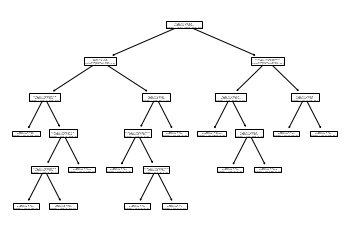

In [273]:
plot_tree(mytree)  ##plot ต้นไม้

**Evaluate**

In [269]:
from sklearn.metrics import accuracy_score ##Import

**Test**

In [270]:
mytree_result = mytree.predict(X_val) ## Test

In [343]:
accuracy_score(y_val,mytree_result)  ##ดูความแมนยำ

0.9841188524590164

**Retain & Evaluate**

In [274]:
# Define
mytree_final = DecisionTreeClassifier(random_state=5)
#Train
mytree_final.fit(X_train,y_train)
#Test
mytreefinal_result = mytree_final.predict(X_test)
accuracy_score(y_test, mytreefinal_result)

0.9813989239046887

**KNN**

**Import**

In [275]:
from sklearn.neighbors import KNeighborsClassifier ##Import

**KNN1**

In [311]:
# Define
neigh1 = KNeighborsClassifier(n_neighbors=4, weights='uniform') # ถามเพื่อนบ้านที่ใกล้สุด 4 คนและทุกๆคนเท่ากัน
#Train
neigh1.fit(X_train2,y_train2)
#Test
KNN1_result = neigh1.predict(X_val)
accuracy_score(y_val, KNN1_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.9841188524590164

**KNN2**

In [315]:
# Define
neigh2 = KNeighborsClassifier(n_neighbors=30, weights='distance') # ถามเพื่อนบ้าน 30 คน และเพื่อนบ้านที่ใกล้มากกว่าเพื่อนบ้านที่ไกล
#Train
neigh2.fit(X_train2,y_train2)
#Test
KNN2_result = neigh2.predict(X_val)
accuracy_score(y_val, KNN2_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.9841188524590164

**KNN3**

In [316]:
# Define
neigh3 = KNeighborsClassifier(n_neighbors=1) # เลือกเพื่อนบ้านที่ใกล้ที่สุดแค่คนเดียว
#Train
neigh3.fit(X_train2,y_train2)
#Test
KNN3_result = neigh3.predict(X_val)
accuracy_score(y_val, KNN3_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.9841188524590164

**Retain & Evaluate**

In [317]:
# Define
neigh2_final = KNeighborsClassifier(n_neighbors=20, weights='distance') # ถามเพื่อนบ้าน 20 คน และเชื่อเพื่อนบ้านที่ใกล้ที่สุดมากกว่าเพื่อนบ้านที่ไกล
#Train
neigh2_final.fit(X_train,y_train)
#Test
KNN2final_result = neigh2_final.predict(X_test)
accuracy_score(y_test, KNN2final_result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.9823212913143735

**Neural Network**

**Import**

In [280]:
from sklearn.neural_network import MLPClassifier ##Import 

**Define**

In [281]:
perceptron1 = MLPClassifier(random_state=6, max_iter=2000,hidden_layer_sizes=1,learning_rate_init=0.005) ##Define 

**Train-Test**

**ANN1**

In [312]:
#Train
perceptron1.fit(X_train2,y_train2) 
#Test
perceptron1_result = perceptron1.predict(X_val)
accuracy_score(y_val,perceptron1_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9016393442622951

**ANN2**

In [283]:
perceptron2 = MLPClassifier(random_state=6, max_iter=2000,hidden_layer_sizes=10,learning_rate_init=0.005) #กำหนด max_iter=2000 และ learning_rate_init=0.005
#Train
perceptron2.fit(X_train2,y_train2)
#Test
perceptron2_result = perceptron2.predict(X_val)
accuracy_score(y_val,perceptron2_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9016393442622951

**ANN3**

In [284]:
perceptron3 = MLPClassifier(random_state=6, max_iter=20000,hidden_layer_sizes=10,learning_rate_init=0.001) #กำหนด max_iter=20000 และ learning_rate_init=0.001
#Train
#Train
perceptron3.fit(X_train2,y_train2)
#Test
perceptron3_result = perceptron3.predict(X_val)
accuracy_score(y_val,perceptron3_result)  ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.8575819672131147

**Retain & Evaluate**

In [285]:
perceptron2_final = MLPClassifier(random_state=6, max_iter=2000,hidden_layer_sizes=10,learning_rate_init=0.005)  ## เลือก ANN2
#Train
perceptron2_final.fit(X_train,y_train)
#Test
perceptron2final_result = perceptron2_final.predict(X_test)
accuracy_score(y_test,perceptron2final_result) ##ค่าความแม่นยำ

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8877786318216756

**Evaluation**

In [286]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix  ##Import

In [287]:
Decision_Tree = accuracy_score(y_test, mytreefinal_result) ### ความแม่นยำของวิธีต้นไม้
Decision_Tree

0.9813989239046887

In [288]:
KNN = accuracy_score(y_test, KNN2final_result) ### ความแม่นยำของวิธี KNN
Decision_Tree
KNN

0.9823212913143735

In [289]:
Neural_Network = accuracy_score(y_test,perceptron2final_result) ### ความแม่นยำของวิธี Neural_Network
Neural_Network

0.8877786318216756

In [290]:
confusion_matrix(y_test,perceptron2final_result) 

array([[   0,  227,    0,    0],
       [   0, 5775,    0,    0],
       [   0,  429,    0,    0],
       [   0,   74,    0,    0]])

In [291]:
ref = classification_report(y_test,perceptron2final_result)
print(ref)

              precision    recall  f1-score   support

    ชานเมือง       0.00      0.00      0.00       227
    ท้องถิ่น       0.89      1.00      0.94      5775
      ธรรมดา       0.00      0.00      0.00       429
        เร็ว       0.00      0.00      0.00        74

    accuracy                           0.89      6505
   macro avg       0.22      0.25      0.24      6505
weighted avg       0.79      0.89      0.84      6505



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No handles with labels found to put in legend.


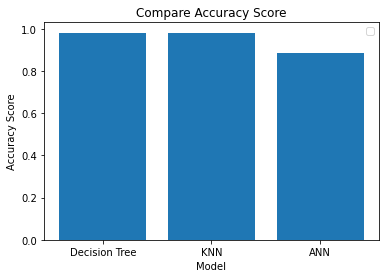

In [292]:
# กราฟเปรียบเทียบความแม่นยำของการวัดผลการทำ classification ด้วย model ต่างๆ 
from matplotlib import pyplot as plt
labels = ['Decision Tree','KNN','ANN']
accuracy = [Decision_Tree,KNN,Neural_Network]
#plot
plt.bar(labels,accuracy)
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.title('Compare Accuracy Score')
plt.legend();

##Data Visualization

In [330]:
from matplotlib import pyplot as plt ### Import
import matplotlib as matplotlib 

In [331]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf  ##โหลด font ภาษาไทย

In [333]:
matplotlib.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') ##ติดตั้ง font ภาษาไทย
matplotlib.rc('font', family='TH Sarabun New')

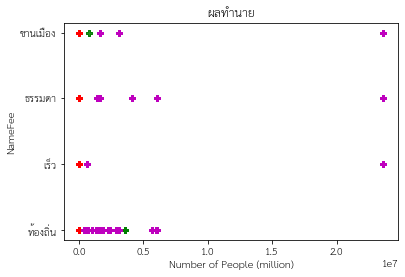

In [344]:
plt.plot(X_test['km'],KNN2final_result,'Pb',alpha =0.2)  ### plot กราฟทำนายผลเพื่อตอบ Challenge
plt.plot(X_test['exact_km'],KNN2final_result,'Pr',alpha = 0.8) 
plt.plot(X_test['จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_x'],KNN2final_result,'Pg',alpha =0.1)
plt.plot(X_test['จำนวนผู้เยี่ยมเยือนทั้งหมด (คน)_y'],KNN2final_result,'Pm',alpha =0.8)
plt.xlabel('Number of People (million)')
plt.ylabel('NameFee')
plt.title('ผลทำนาย')
plt.show()

**อธิบาย** : 

# แบ่งกลุ่มข้อมูลที่มี ลองจิจูด(column : X) และ ละติจูด (column : Y) ที่ใกล้กันจำนวน 5 กลุ่ม 
##K-Means

In [293]:
from sklearn.cluster import KMeans  ##import kmaen
import matplotlib.pyplot as plt ##import pyplot

In [294]:
model = KMeans(n_clusters=5)  ## Define จำนวนกลุ่ม cluster
model ## ดู model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [295]:
X = merged_4_tables[['X','Y']]  ## กำหนด X ให้เอาค่าในตาราง merged_4_tables ซึ่ง X คือ ลองจิจูด และ Y คือ ละติจูด
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [296]:
model.cluster_centers_ #ดู center ของ cluster ที่แบ่งจำนวน 5 กลุ่ม 

array([[100.94084131,  14.37341299],
       [ 99.96663228,   8.041574  ],
       [102.70933475,  17.30342071],
       [ 99.65709877,  17.86526147],
       [104.52319741,  15.13065359]])

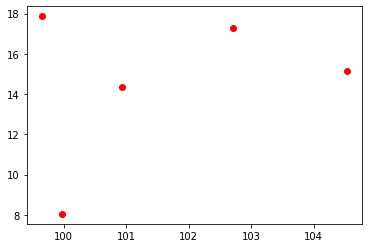

In [297]:
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1] ,c='red')  ## plot จุด cluster center ลงในกราฟ

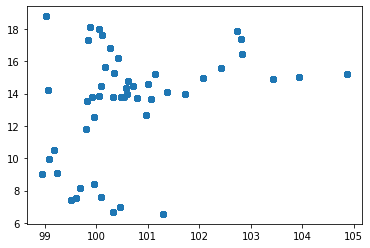

In [298]:
plt.scatter(data=merged_4_tables , x='X',y='Y')  ## plot กราฟ scatter ดูความกระจายของข้อมูล ลองจิจูด และ ละติจูด

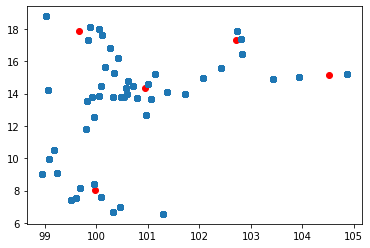

In [299]:
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1] ,c='red')   ### ทำการ plot จุด cluster center และ การกระจายของข้อมูล
plt.scatter(data=merged_4_tables , x='X',y='Y')

In [300]:
identified_clusters = model.fit_predict(X)  ## ระบุ cluster ลงในตัวแปร identified_clusters
identified_clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

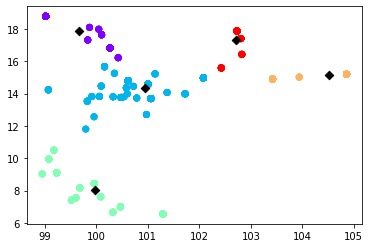

In [301]:
###ทำการเพิ่ม column ชื่อ Cluster ที่ได้ระบุกลุ่มแล้ว ลงในตาราง merged_4_tables
data_with_clusters = merged_4_tables.copy()   
data_with_clusters['Clusters'] = identified_clusters 

## plot กราฟ แสดงกลุ่ม cluster
plt.scatter(data_with_clusters['X'],data_with_clusters['Y'],c=data_with_clusters['Clusters'],cmap='rainbow' ,alpha=0.5)
plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1] ,c='black',alpha=1 ,marker='D')

## **หาจังหวัดที่มีรถไฟขาเข้ามากที่สุด**

In [302]:
data = merged_4_tables[['จังหวัด','NameSt_L','NameFee','StFinal']] ##เลือกคอลัมน์ที่ต้องการ
data ##แสดงข้อมูลของตารางที่เลือก

,จังหวัด,NameSt_L,NameFee,StFinal
0,ชลบุรี,บ้านพลูตาหลวง,เร็ว,3047
1,ชลบุรี,บ้านพลูตาหลวง,เร็ว,3047
2,ชลบุรี,บ้านพลูตาหลวง,เร็ว,3047
3,ชลบุรี,บ้านพลูตาหลวง,เร็ว,3047
4,ชลบุรี,บ้านพลูตาหลวง,เร็ว,3047
...,...,...,...,...
2169,ราชบุรี,ชุมทางหนองปลาดุก,ท้องถิ่น,4020
2170,ราชบุรี,ชุมทางหนองปลาดุก,ท้องถิ่น,4020
2171,ราชบุรี,ชุมทางหนองปลาดุก,ท้องถิ่น,4020
2172,ราชบุรี,ชุมทางหนองปลาดุก,ท้องถิ่น,4020


In [303]:
Top_Prov = data.groupby('จังหวัด').count().sort_values(by=['StFinal'],ascending=False) ##นำข้อมูล จังหวัด จากตาราง Data โดยพิจารณาจาก StFinal 
Top_Prov  ##เรียกดูตาราง

,NameSt_L,NameFee,StFinal
จังหวัด,,,
อุบลราชธานี,224,224,224
นครราชสีมา,205,205,205
ลพบุรี,161,161,161
ฉะเชิงเทรา,133,133,133
เชียงใหม่,128,128,128
หนองคาย,112,112,112
สระบุรี,98,98,98
นครศรีธรรมราช,90,90,90
พิษณุโลก,80,80,80


In [304]:
Top_Prov.shape ##ดูขนาดของตาราง

(33, 3)

In [305]:
from matplotlib import pyplot as plt  ## เรียกฟังก์ชันในการ Plot กราฟ

In [306]:
Top_Prov.iloc[-33:,1]  ##ตัดคอมลัมน์

จังหวัด
อุบลราชธานี        224
นครราชสีมา         205
ลพบุรี             161
ฉะเชิงเทรา         133
เชียงใหม่          128
หนองคาย            112
สระบุรี             98
นครศรีธรรมราช       90
พิษณุโลก            80
สงขลา               79
กรุงเทพ             76
สุรินทร์            73
สุราษฎร์ธานี        72
ยะลา                56
ปราจีนบุรี          55
นครสวรรค์           44
ชุมพร               43
อุดรธานี            42
นครปฐม              40
ราชบุรี             37
อุตรดิตถ์           34
พระนครศรีอยุธยา     29
ตรัง                29
กาญจนบุรี           21
สุพรรณบุรี          20
แพร่                19
ขอนแก่น             18
สุโขทัย             14
พัทลุง              14
ประจวบคีรีขันธ์     13
พิจิตร              13
ชลบุรี              10
ปทุมธานี             6
Name: NameFee, dtype: int64

**Plot กราฟ**

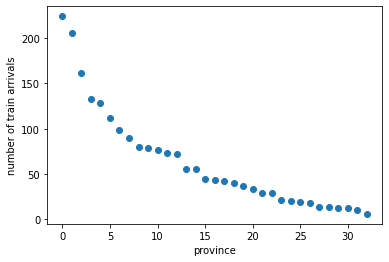

In [307]:
plt.scatter(range(len(Top_Prov.iloc[-33:,1])),Top_Prov.iloc[-33:,1]) ## Plot กราฟ
plt.xlabel('province'); ##ใส่ชื่อแกน X
plt.ylabel('number of train arrivals'); ##ใส่ชื่อแกน Y

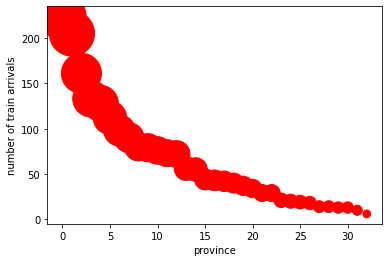

In [308]:
plt.scatter(range(len(Top_Prov.iloc[-33:,1])),Top_Prov.iloc[-33:,1],s=10*Top_Prov.iloc[-33:,1],c=['r'])  ## Plot กราฟ โดยขนาดของจุด*แปรผันตรงกับขนาดของข้อมูล
plt.xlabel('province'); ##ใส่ชื่อแกน X
plt.ylabel('number of train arrivals'); ##ใส่ชื่อแกน Y

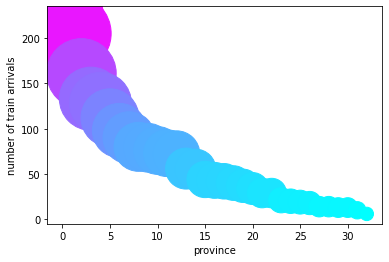

In [309]:
plt.scatter(range(len(Top_Prov.iloc[-33:,1])),Top_Prov.iloc[-33:,1],s=30*Top_Prov.iloc[-33:,1],c=0.5*Top_Prov.iloc[-33:,1],cmap='cool')  ## Plot กราฟ โดยเปลี่ยนสีจุดตามข้อมูล
plt.xlabel('province'); ##ใส่ชื่อแกน X
plt.ylabel('number of train arrivals'); ##ใส่ชื่อแกน Y

#สรุป

In [310]:
Top_Prov

,NameSt_L,NameFee,StFinal
จังหวัด,,,
อุบลราชธานี,224,224,224
นครราชสีมา,205,205,205
ลพบุรี,161,161,161
ฉะเชิงเทรา,133,133,133
เชียงใหม่,128,128,128
หนองคาย,112,112,112
สระบุรี,98,98,98
นครศรีธรรมราช,90,90,90
พิษณุโลก,80,80,80


จากตารางจะเห็นได้ว่า จังหวัดอุบลราชธานี เป็นจังหวัดที่มีรถไฟขาเข้ามากที่สุด


